In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import numpy as np
from functools import reduce

In [ ]:
# READ in csv file

In [80]:
df = pd.read_csv('etc_orig.csv')  

In [81]:
x = df.Date
y = df.Open.values

In [56]:
#plt.figure(figsize=(16, 10))
#sns.lineplot(x = x, y = y, data = df)

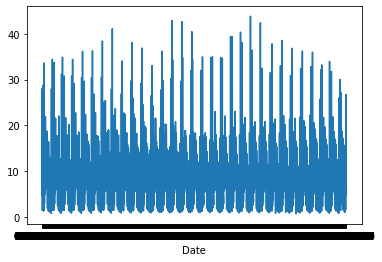

In [83]:
sns.lineplot(x = x, y = y, data = df)

In [64]:
def percentChange(startPoint,currentPoint):
    return ((currentPoint-startPoint)/startPoint)*100.00

In [65]:
def movingAverage(timeSeries, timeFrame): 
    return timeSeries.rolling(window=timeFrame).mean()

In [66]:
ma3 = movingAverage(df.Open, 3)
ma5 = movingAverage(df.Open, 5)

In [67]:
tsLen = len(ma3)
start = 10

In [68]:
changeCollect = []
outcomeCollectY1 = [] # average of 5-10 days in the future
outcomeCollectY2 = [] # 8 + days
outcomeCollectY3 = [] # binary
outcomeCollectY4 = [] # multiclass 

In [69]:
while start < tsLen:
    # get X variables
    p1 = percentChange(ma3[start-10], ma3[start-9])
    p2 = percentChange(ma3[start-10], ma3[start-8])
    p3 = percentChange(ma3[start-10], ma3[start-7])
    p4 = percentChange(ma3[start-10], ma3[start-6])
    p5 = percentChange(ma3[start-10], ma3[start-5])
    p6 = percentChange(ma3[start-10], ma3[start-4])
    p7 = percentChange(ma3[start-10], ma3[start-3])
    p8 = percentChange(ma3[start-10], ma3[start-2])
    p9 = percentChange(ma3[start-10], ma3[start-1])
    p10 = percentChange(ma3[start-10], ma3[start])
    dataPoints = [p1, p2, p3, p4, p5, p6, p7, p8, p9, p10]
    changeCollect.append(dataPoints)
    
    # get Y variable
    # current point
    currentPoint = ma3[start]
    
    # get Y variable 1. Average in 5-10 days time
    outcomeRange = ma3[start+5:start+10]
    outcomeRange = outcomeRange[~np.isnan(outcomeRange)]
    try:
        avgOutcome = reduce(lambda x, y: x + y, outcomeRange) / len(outcomeRange)
    except:
        avgOutcome = 0
    
    # get Y variable 2. Price in 8 days time
    try:
        outcome8day = ma3[start+8]
    except:
        outcome8day = 0

    futureOutcomeY1 = percentChange(currentPoint, avgOutcome)
    futureOutcomeY2 = percentChange(currentPoint, outcome8day)
    
    # get Y variable 3. Binary classification
    if futureOutcomeY2 >= 0:
        futureOutcomeY3 = 1
    else:
        futureOutcomeY3 = 0
        
    # get Y variable 4. Multi-class classification
    if futureOutcomeY2 < -18.0:
        futureOutcomeY4 = 0
    elif futureOutcomeY2 > -18.0 and futureOutcomeY2 < -10:
        futureOutcomeY4 = 1
    elif futureOutcomeY2 > -10.0 and futureOutcomeY2 < -5:
        futureOutcomeY4 = 2
    elif futureOutcomeY2 > -5.0 and futureOutcomeY2 < -2.5:
        futureOutcomeY4 = 3
    elif futureOutcomeY2 > -2.5 and futureOutcomeY2 < 0:
        futureOutcomeY4 = 5
    elif futureOutcomeY2 > 0 and futureOutcomeY2 < -2.5:
        futureOutcomeY4 = 6
    elif futureOutcomeY2 > 2.5 and futureOutcomeY2 < 5:
        futureOutcomeY4 = 7
    elif futureOutcomeY2 > 5 and futureOutcomeY2 < 10:
        futureOutcomeY4 = 8
    elif futureOutcomeY2 > 10 and futureOutcomeY2 < 18:
        futureOutcomeY4 = 9
    else:
        futureOutcomeY4 = 10
    
    # collect data
    outcomeCollectY1.append(futureOutcomeY1)
    outcomeCollectY2.append(futureOutcomeY2)
    outcomeCollectY3.append(futureOutcomeY3)
    outcomeCollectY4.append(futureOutcomeY4)
    
    start+=1

# Distribution of percentage increases per 8 days

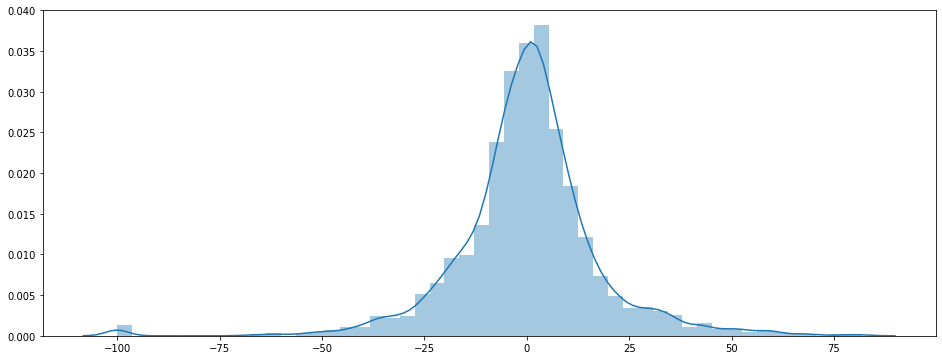

In [70]:
plt.figure(figsize=(16, 6))
sns.distplot(outcomeCollectY2)

In [71]:
for i in [10, 20, 30, 40, 50, 60, 70, 80, 90]:
    per = np.percentile(outcomeCollectY2, i)
    print("percentile: " + str(i) + " value: " + str(per))

percentile: 10 value: -18.372211421233406
percentile: 20 value: -9.82191756258528
percentile: 30 value: -5.29822997371058
percentile: 40 value: -2.280798300013751
percentile: 50 value: 0.666159418639458
percentile: 60 value: 2.981423963278512
percentile: 70 value: 5.9478553963852985
percentile: 80 value: 10.214306987934538
percentile: 90 value: 18.138906067038832


In [18]:
data = [changeCollect, outcomeCollectY1, outcomeCollectY2, outcomeCollectY3, outcomeCollectY4] 

In [19]:
for i in data:
    print(len(i))

1615
1615
1615
1615
1615


# Model time

In [26]:
X = changeCollect[2:]
Y = outcomeCollectY3[2:]

In [27]:
len(x_features)

1613

In [90]:
from sklearn.model_selection import train_test_split

In [107]:
window_size = 100
splits = []

for i in range(window_size, len(X), 25):
    feature_chunks = np.array(X[i-window_size:i])
    pred_chunks = np.array(Y[i-window_size:i])
    X_train, X_test, y_train, y_test = train_test_split(feature_chunks, pred_chunks, test_size=0.33, shuffle=False)
    splits.append(('X_train:', X_train,'y_train:', y_train,'X_test:', X_test, 'y_test:', y_test))

In [108]:
len(splits)

61

In [134]:
# Fit model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


def fitModel(mod, X, y):
    mod = mod.fit(X, y)
    return mod

def predict(mod, X_test):
    preds = mod.predict_proba(X_test)
    return preds

def convertToBinary(predicted):
    bin_pred = []
    for row in predicted:
        if row[0] > 0.5: 
            res = 0
        else:
            res = 1
        bin_pred.append(res)
    return(bin_pred)

def acc(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy

In [138]:
clf = LogisticRegression(random_state=0)

In [141]:
acc_all = []
# View result
for a_tuple in splits:
    xtrain = a_tuple[1]
    ytrain = a_tuple[3]
    xtest = a_tuple[5]
    ytest = a_tuple[7]
    clf = fitModel(clf, xtrain, ytrain)
    predd = predict(clf, xtest)
    bin_predd = convertToBinary(predd)
    accc = acc(ytest, bin_predd)
    acc_all.append(accc)

/anaconda3/envs/trading/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/anaconda3/envs/trading/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [142]:
# Average Accuracy
sum(acc_all)/len(acc_all)

0.5181321410829607